<p style="font-family:Roboto; font-size: 28px; color: magenta"> Python for OpenCV: Image Segmentation with Watershed Algorithm</p>

In [1]:
'''Image segmentation is a fundamental computer vision task that involves partitioning an image 
into meaningful and semantically homogeneous regions'''
'''The Watershed Algorithm is a classical image segmentation technique that is based on the concept of watershed transformation.'''

'The Watershed Algorithm is a classical image segmentation technique that is based on the concept of watershed transformation.'

<p style="font-family:consolas; font-size: 24px; color: orange"> Key Concepts of the Watershed algorithm:</p>

<p style="font-family:consolas; font-size: 24px; color: orange"> 1. Marker placement: The first step is to place markers on the local minima</p>

<p style="font-family:consolas; font-size: 24px; color: orange"> 2. Flooding: The algorithm then floods the image with different colors, starting from the markers</p>

<p style="font-family:consolas; font-size: 24px; color: orange"> 3. Catchment basin formation: As the color spreads, the catchment basins are gradually filled, creating a segmentation of the image</p>

<p style="font-family:consolas; font-size: 24px; color: orange"> 4. Boundary identification: The watershed algorithm uses the boundaries between the different colored regions to identify the objects or regions in the image</p>

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Important types of blurring:</p>

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Loading the image</p>

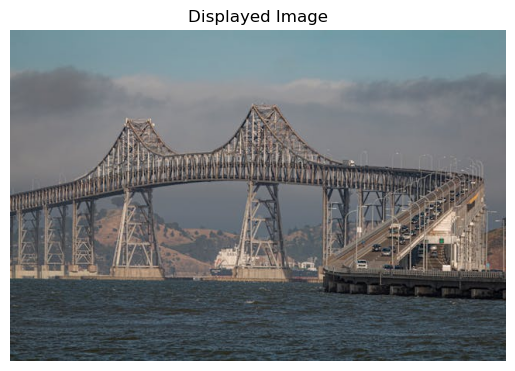

In [29]:
img = cv2.imread('./data/pexels-bridge.jpg')

img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axes for a cleaner look
plt.title("Displayed Image")  # Optional: Add a title
plt.show()

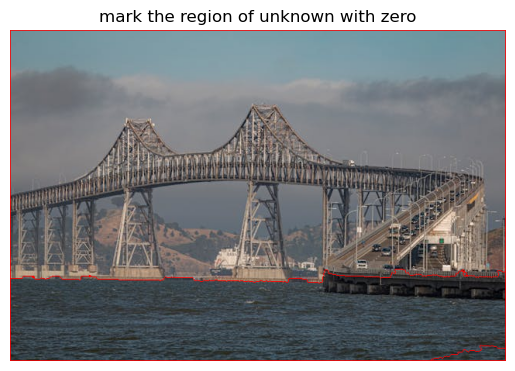

In [32]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#threshold using otsu
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#noise kernel
kernel = np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
#sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
#finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
#finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
#marker labeling
#connected components determines the connectivity of block-like regions in a binary image.
ret,markers = cv2.connectedComponents(sure_fg)
#add one to all labels so that sure background is not 0, but 1
markers = markers+1
#now, mark the region of unknown with zero
markers[unknown==255] = 0
markers= cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axes for a cleaner look
plt.title("mark the region of unknown with zero")  # Optional: Add a title
plt.show()